In [1]:
import pandas as pd

In [2]:
# 加载数据
df = pd.read_csv('zhengzhou_house_data.csv',encoding='UTF-8-SIG')

# 查看数据的前几行
df.head()

,name,size_m2,features,orientation,floor,bedroom,living_room,bathroom,Apartment Layout Classification,price_10k_rmb,unit_price_10k_rmb_per_m2
0,中间好楼层 冯庄地铁口 人车分流小区 装修保持好拎包入住,88.55,"['南', '优势户型', '房东急售', '随时可看']",南,33,2,2,1,大户型,79.9,0.9024
1,亚星城市山水 交通便捷 双卫生间 临地铁 拎包入住,131.62,"['南', '满五年', '近地铁', '车位充足']",南,28,3,2,2,大户型,118.0,0.8966
2,2024年交付 121平精装修 双卫三房 拎包入住 看房随时,121.56,"['南', '热门小区', '南北通透', '满五']",南,20,3,2,2,大户型,128.0,1.0530
3,铁道陇海家园 近地铁 精装可拎包入住 商圈成熟 南北通透,124.86,"['南', '满五年', '近地铁', '采光较好']",南,26,3,2,2,大户型,150.0,1.2014
4,必看好房 业主二次装修 拎包入住 近 出门就是地铁口,94.41,"['南', '热门小区', '满五', '房东急售']",南,33,3,2,1,大户型,96.0,1.0169


In [13]:
area_column = 'unit_price_10k_rmb_per_m2'

# 计算统计量
mean_value = df[area_column].mean()  # 平均值
max_value = df[area_column].max()    # 最大值
min_value = df[area_column].min()    # 最小值
median_value = df[area_column].median()  # 中位数

# 输出结果
print(f"平均值: {mean_value}")
print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"中位数: {median_value}")

平均值: 1.352529273565871
最大值: 6.1112
最小值: 0.35200000000000004
中位数: 1.2796


In [15]:
# 假设特征列的列名为 'features'
features_column = 'features'

# 统计每个值的出现次数
value_counts = df[features_column].value_counts()

# 提取出现次数最多的值
most_frequent_value = value_counts.idxmax()  # 获取最频繁的值
most_frequent_count = value_counts.max()    # 获取最频繁值的出现次数

# 计算占比
total_samples = len(df)  # 总样本数
percentage = (most_frequent_count / total_samples) * 100  # 计算占比

# 输出结果
print(f"出现最多次数的特点: {most_frequent_value}")
print(f"出现次数: {most_frequent_count}")
print(f"占比: {percentage:.2f}%")  # 保留两位小数

出现最多次数的特点: ['南满五年近地铁']
出现次数: 1077
占比: 15.52%


In [17]:
# 假设特征列的列名为 'features'
features_column = 'features'

# 条件筛选：同时包含 "南"、"满五年" 和 "近地铁"
condition = (
    df[features_column].str.contains('南') & 
    df[features_column].str.contains('满五年') & 
    df[features_column].str.contains('近地铁')
)

# 统计数量
count = condition.sum()

# 计算占比
total_samples = len(df)  # 总样本数
percentage = (count / total_samples) * 100  # 计算占比

# 输出结果
print(f"同时出现 '南'、'满五年' 和 '近地铁' 的数量: {count}")
print(f"占比: {percentage:.2f}%")  # 保留两位小数

同时出现 '南'、'满五年' 和 '近地铁' 的数量: 3200
占比: 46.12%


In [16]:

# 假设朝向列的列名为 'orientation'
orientation_column = 'orientation'

# 统计各朝向的占比
orientation_percentage = df[orientation_column].value_counts(normalize=True) * 100

# 输出结果
print("各朝向占比:")
print(orientation_percentage.round(2).astype(str) + '%')  # 保留两位小数并添加百分号

各朝向占比:
南    95.94%
东     2.13%
西     1.04%
北     0.89%
Name: orientation, dtype: object


In [18]:


# 假设户型分布列的列名为 'Apartment Layout Classification'
layout_column = 'Apartment Layout Classification'

# 统计每种户型的占比
layout_percentage = df[layout_column].value_counts(normalize=True) * 100

# 输出结果
print("每种户型的占比:")
print(layout_percentage.round(2).astype(str) + '%')  # 保留两位小数并添加百分号

每种户型的占比:
大户型    95.75%
小户型     4.25%
Name: Apartment Layout Classification, dtype: object


In [4]:
!pip install seaborn --upgrade

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


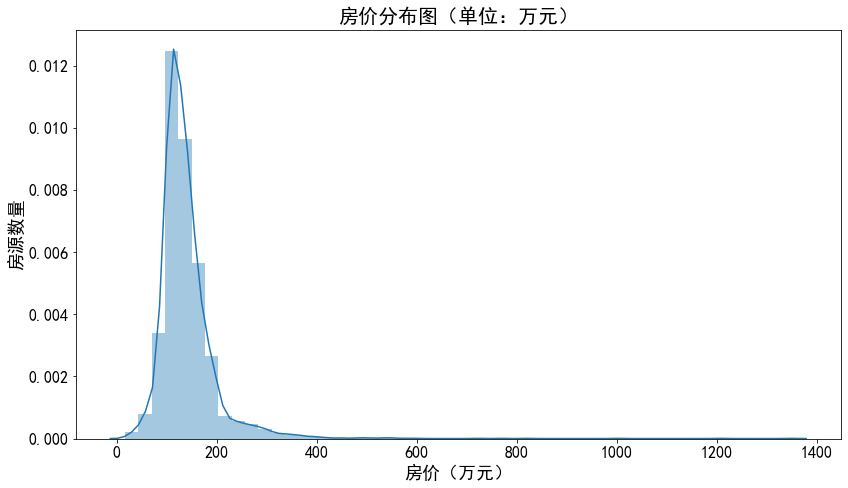

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('zhengzhou_house_data.csv')

# 设置字体和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置全局字体大小
plt.rcParams.update({'font.size': 14})  # 增大基础字体大小

plt.figure(figsize=(12, 7))  # 稍微增大画布尺寸
sns.distplot(df['price_10k_rmb'], bins=50, kde=True, hist=True)

# 设置标题和标签字体大小
plt.title('房价分布图（单位：万元）', fontsize=20)  # 标题字体更大
plt.xlabel('房价（万元）', fontsize=18)
plt.ylabel('房源数量', fontsize=18)

# 调整坐标轴刻度标签大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()  # 自动调整子图参数，避免标签重叠
plt.show()

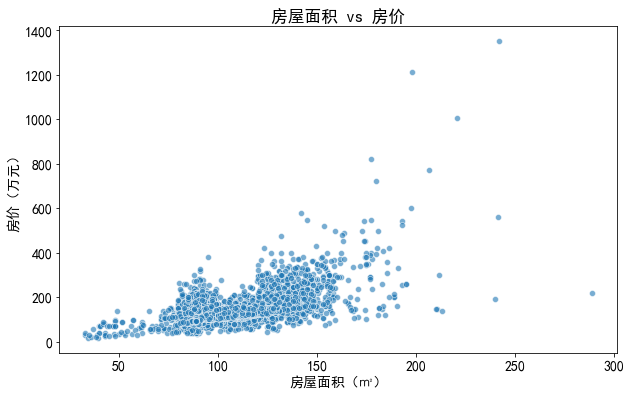

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size_m2', y='price_10k_rmb', data=df, alpha=0.6)
plt.title('房屋面积 vs 房价')
plt.xlabel('房屋面积（㎡）')
plt.ylabel('房价（万元）')
plt.show()


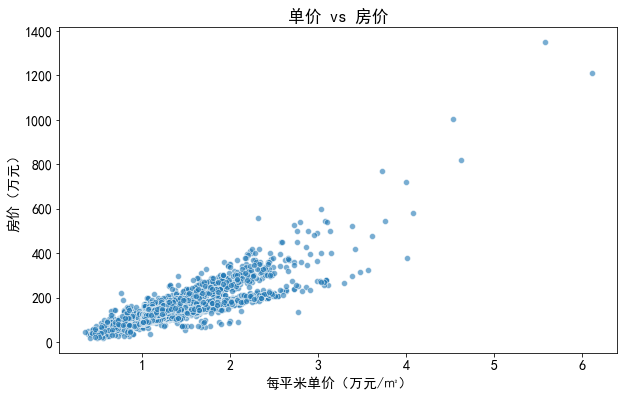

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price_10k_rmb_per_m2', y='price_10k_rmb', data=df, alpha=0.6)
plt.title('单价 vs 房价')
plt.xlabel('每平米单价（万元/㎡）')
plt.ylabel('房价（万元）')
plt.show()


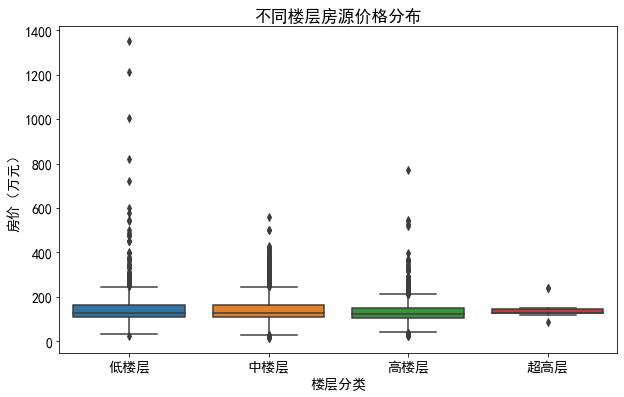

In [5]:
# 楼层分组
df['floor_group'] = pd.cut(df['floor'], bins=[0, 10, 30, 50, 102], labels=['低楼层', '中楼层', '高楼层', '超高层'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='floor_group', y='price_10k_rmb', data=df)
plt.title('不同楼层房源价格分布')
plt.xlabel('楼层分类')
plt.ylabel('房价（万元）')
plt.show()


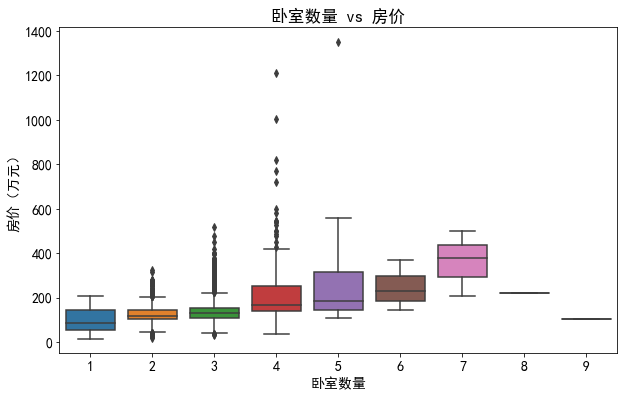

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedroom', y='price_10k_rmb', data=df)
plt.title('卧室数量 vs 房价')
plt.xlabel('卧室数量')
plt.ylabel('房价（万元）')
plt.show()


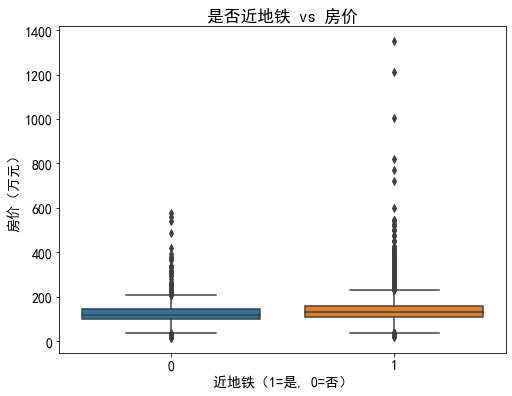

In [7]:
# 示例：是否近地铁的房价分布
df['near_metro'] = df['features'].apply(lambda x: 1 if '近地铁' in x else 0)

plt.figure(figsize=(8, 6))
sns.boxplot(x='near_metro', y='price_10k_rmb', data=df)
plt.title('是否近地铁 vs 房价')
plt.xlabel('近地铁（1=是, 0=否）')
plt.ylabel('房价（万元）')
plt.show()
